# Day_038

### 練習時間
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。
* wine = datasets.load_wine()
* boston = datasets.load_boston()
* breast_cancer = datasets.load_breast_cancer()
#### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

import warnings
warnings.simplefilter('ignore') # 忽略警告訊息

### Load boston house-prices dataset 

In [2]:
boston = datasets.load_boston()

df_boston = pd.DataFrame(boston.data, columns = boston.feature_names)
print(df_boston.shape)
df_boston.head()

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [4]:
print(pd.Series(boston.target).value_counts(bins = 10))
print("")
print(f"Unique values in boston.target = {np.unique(boston.target)}")

(18.5, 23.0]    154
(14.0, 18.5]     85
(23.0, 27.5]     84
(9.5, 14.0]      55
(27.5, 32.0]     39
(32.0, 36.5]     29
(4.954, 9.5]     22
(45.5, 50.0]     21
(41.0, 45.5]     10
(36.5, 41.0]      7
dtype: int64

Unique values in boston.target = [  5.    5.6   6.3   7.    7.2   7.4   7.5   8.1   8.3   8.4   8.5   8.7
   8.8   9.5   9.6   9.7  10.2  10.4  10.5  10.8  10.9  11.   11.3  11.5
  11.7  11.8  11.9  12.   12.1  12.3  12.5  12.6  12.7  12.8  13.   13.1
  13.2  13.3  13.4  13.5  13.6  13.8  13.9  14.   14.1  14.2  14.3  14.4
  14.5  14.6  14.8  14.9  15.   15.1  15.2  15.3  15.4  15.6  15.7  16.
  16.1  16.2  16.3  16.4  16.5  16.6  16.7  16.8  17.   17.1  17.2  17.3
  17.4  17.5  17.6  17.7  17.8  17.9  18.   18.1  18.2  18.3  18.4  18.5
  18.6  18.7  18.8  18.9  19.   19.1  19.2  19.3  19.4  19.5  19.6  19.7
  19.8  19.9  20.   20.1  20.2  20.3  20.4  20.5  20.6  20.7  20.8  20.9
  21.   21.1  21.2  21.4  21.5  21.6  21.7  21.8  21.9  22.   22.1  22.2
  22.3  22.4  22.5  22.6

Data shape:  (506, 1)
      0
0  2.31
1  7.07
2  7.07
3  2.18
4  2.18
Coefficients:  [-0.64959885]
Mean squared error: 63.06
Variance score: 0.23


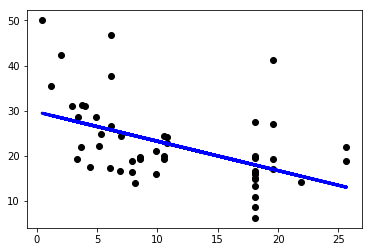

In [5]:
# 為方便視覺化，我們只使用資料集中的 1 個 feature (column)
# 利用 np.newaxis 將一維陣列擴展為二維矩陣(行向量轉成列向量)，使 boston_X 每一項都代表一個樣本
boston_X = boston.data[:, np.newaxis, 2]  # 取 INDUS 欄位
print("Data shape: ", boston_X.shape) # 可以看見有 506 筆資料與我們取出的其中一個 feature
print(pd.DataFrame(boston_X).head())

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(boston_X, boston.target, test_size = 0.1, random_state = 4)

# 建立一個線性回歸模型
regr = linear_model.LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(x_test)

# 可以看回歸模型的參數值
print('Coefficients: ', regr.coef_)

# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# 畫出回歸模型與實際資料的分佈
plt.scatter(x_test, y_test,  color = 'black')
plt.plot(x_test, y_pred, color = 'blue', linewidth = 3)
plt.show()

In [6]:
# Use dataset boston to predict, split train/test data 
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size = 0.1, random_state = 4)

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

Coefficients:  [ -1.24793110e-01   4.83961673e-02   1.88111508e-02   3.08800922e+00
  -1.73655165e+01   3.60982405e+00   2.27233321e-03  -1.49381500e+00
   3.19455416e-01  -1.27236845e-02  -9.28369630e-01   9.60925451e-03
  -5.34508193e-01]
Mean squared error: 17.03
Variance score: 0.79


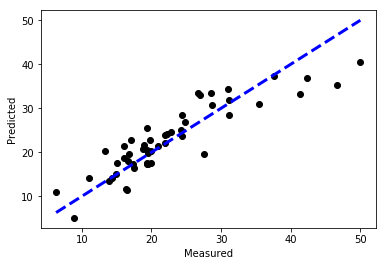

In [7]:
print('Coefficients: ', regr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# 畫出回歸模型與實際資料的分佈
plt.scatter(y_test, y_pred,  color = 'black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color = 'blue', linewidth = 3)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()

### Load wine  dataset

In [8]:
wine = datasets.load_wine()

df_wine = pd.DataFrame(wine.data, columns = wine.feature_names)
print(df_wine.shape)
df_wine.head()

(178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [9]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
dtypes: float64(13)
memory usage: 18.2 KB


In [10]:
print(pd.Series(wine.target).value_counts())
print("")
print(f"Unique values in wine.target = {np.unique(wine.target)}")

1    71
0    59
2    48
dtype: int64

Unique values in wine.target = [0 1 2]


In [32]:
# Use dataset boston to predict, split train/test data 
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size = 0.2, random_state = 4)

regr = linear_model.LogisticRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

In [33]:
print(f'Accuracy = {accuracy_score(y_test, y_pred):.3f}')
print('Coefficients: ', regr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Accuracy = 0.972
Coefficients:  [[ -6.82864779e-01   7.19709566e-01   9.78123238e-01  -5.71326897e-01
   -3.15688084e-02   3.00522775e-01   1.11716506e+00  -3.43549778e-02
   -4.90150215e-01  -1.05374113e-02  -1.54185796e-01   9.61331414e-01
    1.81479366e-02]
 [  9.32405991e-01  -1.02836307e+00  -7.03687526e-01   2.35034368e-01
    8.51406104e-03   7.62359762e-02   4.71638459e-01   5.60638803e-01
    6.15085511e-01  -1.81947987e+00   9.33098198e-01   7.36442197e-02
   -1.40242413e-02]
 [ -4.72180741e-01   6.31034394e-01  -6.36847579e-02   1.56380289e-01
    3.13408128e-02  -7.52374558e-01  -1.62587954e+00  -1.31786834e-01
   -7.01391158e-01   1.03384290e+00  -4.87953685e-01  -1.15357424e+00
    1.40302540e-04]]
Mean squared error: 0.03
Variance score: 0.96
